<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Добавляем нужные нам библиотеки

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, r2_score
from sklearn.utils import shuffle
from warnings import simplefilter

Считываем csv-файл и сохраняем в датафрейм

In [64]:
df = pd.read_csv('/datasets/Churn.csv', index_col='RowNumber')

Выводим общую информацию о датафрейме

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           9091 non-null   float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


In [66]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Выводим сам датафрейм

In [67]:
display(df.head(10))

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0


Приведем к нижнему регистру

In [68]:
df.columns = df.columns.str.lower()
df.columns = ['customer_id', 'surname', 'credit_score', 'geography','gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_crcard','isactive_member', 'estimated_salary', 'exited']
df.columns

Index(['customer_id', 'surname', 'credit_score', 'geography', 'gender', 'age',
       'tenure', 'balance', 'num_of_products', 'has_crcard', 'isactive_member',
       'estimated_salary', 'exited'],
      dtype='object')

Ищем строки дубликаты

In [69]:
duplicate_row = df[df.duplicated()].count()
duplicate_row

customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_crcard          0
isactive_member     0
estimated_salary    0
exited              0
dtype: int64

Cмотрим кол-во пропущенных значений по всем столбцам

In [70]:
print(df.isna().sum())

customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_crcard            0
isactive_member       0
estimated_salary      0
exited                0
dtype: int64


Пропущенные значения можно заполнить линейным методом интерполяции (их не очень много - чуть меньше 10%), тем не менее нельзя исключать вероятности, что в столбце записано кол-во полных лет и человек является клиентом меньше года - следовательно пропущенные значения могут быть нулем 

In [71]:
df['tenure'] = df['tenure'].interpolate(method = 'linear')

Взглянем на распределение признаков

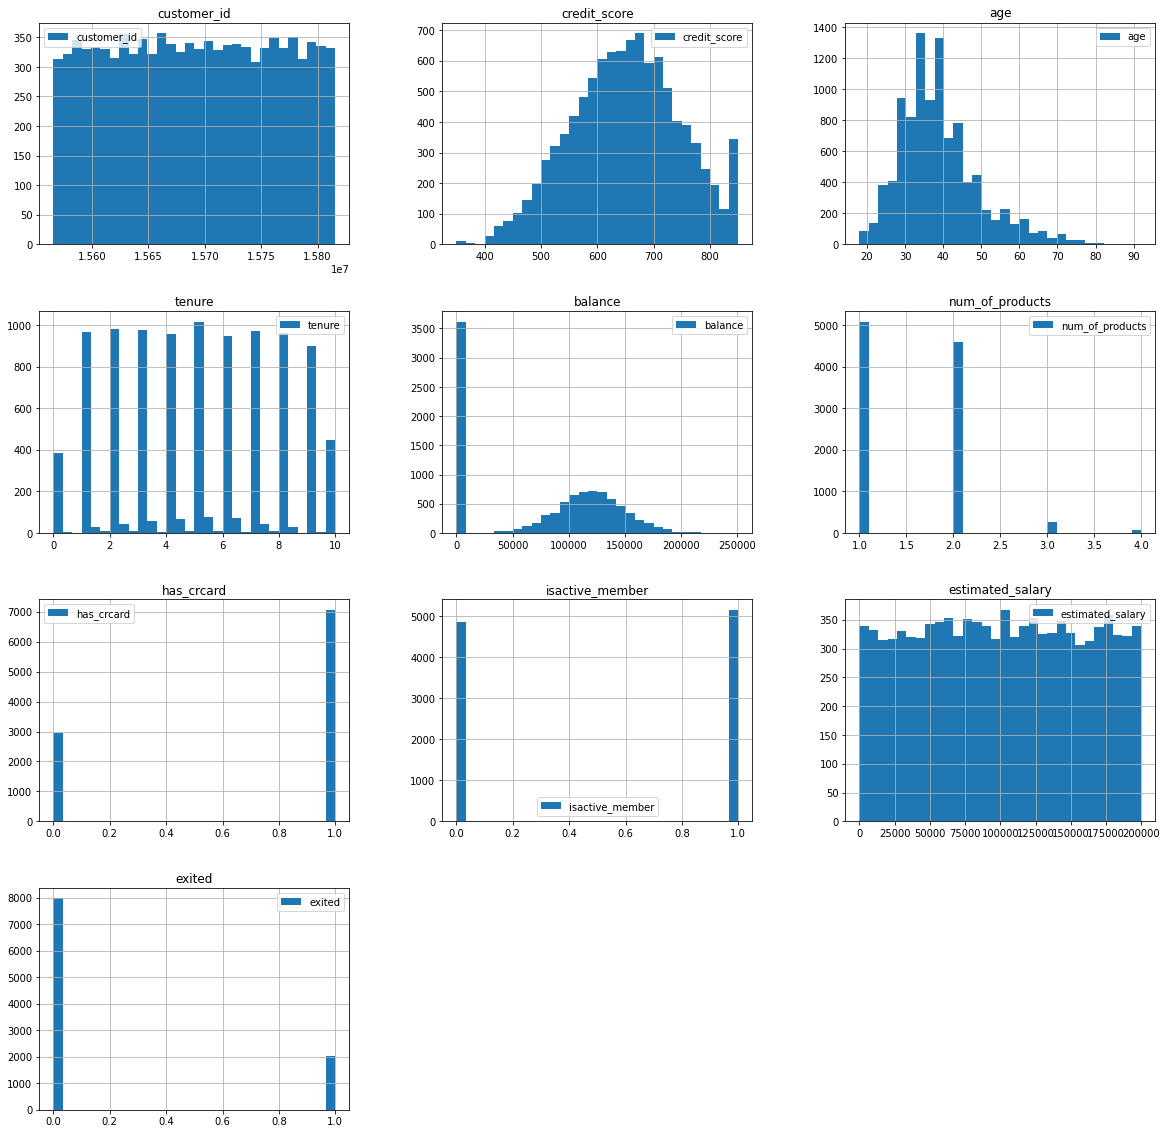

In [72]:
df.hist(bins=30, figsize=(20,20), legend = True)
plt.show()

<AxesSubplot:>

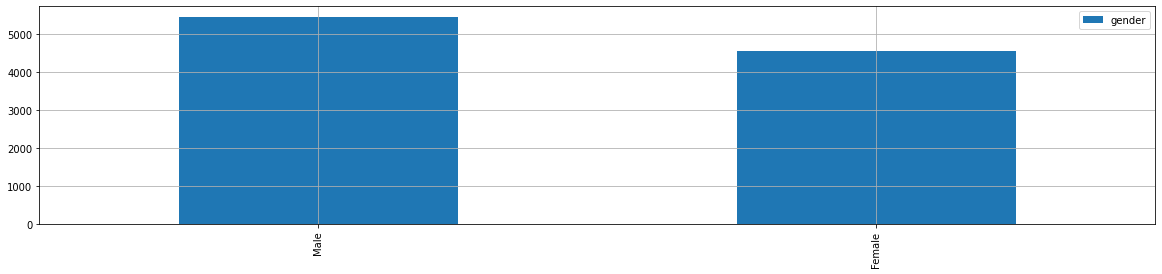

In [73]:
df['gender'].value_counts().plot(kind = 'bar', grid=True, figsize=(20,4), legend = True)

<AxesSubplot:>

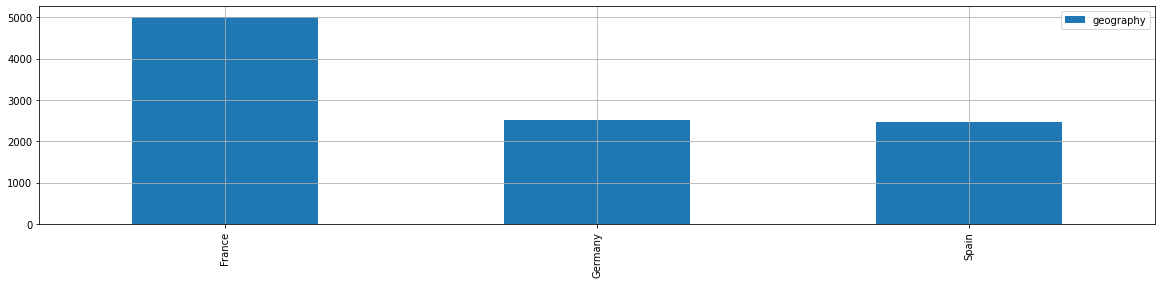

In [74]:
df['geography'].value_counts().plot(kind = 'bar', grid=True, figsize=(20,4), legend = True)

В данных не присутсвует каких-нибудь заметных выбросов. Распределение в столбце целевого признака exited 1:4 - это может повлиять на качество моделей. 
Столбцы gender и geography можно преобразовать с помощью OHE, т.к. в них не очень много категорий.

Удаляем признаки, которые не нужны для дальнейшей классификации

In [75]:
df = df.drop(['customer_id', 'surname'], axis=1)

Преобразовываем столбцы (drop_first=True удаляет лишние/избыточные данные) и смотрим что получилось

In [76]:
df = pd.get_dummies(df, drop_first=True)
print(df.info())
display(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   tenure             10000 non-null  float64
 3   balance            10000 non-null  float64
 4   num_of_products    10000 non-null  int64  
 5   has_crcard         10000 non-null  int64  
 6   isactive_member    10000 non-null  int64  
 7   estimated_salary   10000 non-null  float64
 8   exited             10000 non-null  int64  
 9   geography_Germany  10000 non-null  uint8  
 10  geography_Spain    10000 non-null  uint8  
 11  gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 810.5 KB
None


,credit_score,age,tenure,balance,num_of_products,has_crcard,isactive_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
2,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
3,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
4,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
5,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9997,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9998,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0


### Вывод
- Данные загружены. 
- Дубликатов нет. 
- Названия столбцов приведены к нижнему регистру.
- Признаки `row_number`, `customer_id` и `surname` удалены, так как целевой признак от них никак не зависит.
- Были рассмотрены распределения признаков.
- Числовые признаки приведены к стандартному виду
- Категориальные признаки преобразованы методом OHE.
- Целевой признак распределён в сооотношении 1:4
- В признаке `tenure` заполнены пропущенные значения линейным методом интерполяции 

## Исследование задачи

Делим данные на features и target

In [77]:
features = df.drop('exited', axis=1)
target = df['exited']

Разбиваем данные на 3 выборки: обучающую, валидацию и тестовую. И проверяем сколько строк у нас в каждой.

In [78]:
train, valid, test = np.split(df.sample(frac=1, random_state=12345), [int(.6*len(df)), int(.8*len(df))])
print('Кол-во строк в обучающей:', train.shape[0])
print('Кол-во строк в валидации:', valid.shape[0])
print('Кол-во строк в тестовой:', test.shape[0])

Кол-во строк в обучающей: 6000
Кол-во строк в валидации: 2000
Кол-во строк в тестовой: 2000


In [79]:
features_train = train.drop(['exited'], axis=1)
target_train = train['exited']
features_valid = valid.drop(['exited'], axis=1)
target_valid = valid['exited']
features_test = test.drop(['exited'], axis=1)
target_test = test['exited']

Масштабируем численные признаки

In [80]:
numerics = ['credit_score', 'age', 'balance', 'estimated_salary']
scaler = StandardScaler()
df[numerics] = scaler.fit_transform(df[numerics])

Написал эту строчку специально, чтобы не выскакивали FutureWarning.

In [81]:
simplefilter(action='ignore', category=FutureWarning)

Согласно заданию попробуем обучить модели несмотря на дисбаланс в exited.

Исследуем модель метода наивного байесовского классификатора, проверяем на тестовой и на валидной выборках

In [98]:
model = GaussianNB()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1_metr = f1_score(target_valid, predicted_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc = roc_auc_score(target_valid,probabilities_one_valid)
print('f1_score модели метода наивного байесовского классификатора:', f1_metr, 'AUC-ROC:', auc)

f1_score модели метода наивного байесовского классификатора: 0.13698630136986303 AUC-ROC: 0.7286562371308134


Исследуем модель метода k-ближайших соседей, проверяем на тестовой и на валидной выборках

In [82]:
best_model = None
best_f1 = 0
best_neighb = 0
for neighb in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=neighb)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1_metr = f1_score(target_valid, predicted_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
    if f1_metr > best_f1:
        best_model = model
        best_neighb = neighb
        best_f1 = f1_metr
        auc = auc_roc
print('f1_score наилучшей модели метода k-ближайших соседей на валидационной выборке:', best_f1, ", Кол-во соседей:", best_neighb, 
      '        AUC-ROC:', auc)

f1_score наилучшей модели метода k-ближайших соседей на валидационной выборке: 0.23067484662576687 , Кол-во соседей: 1         AUC-ROC: 0.5169229321771694


Исследуем модель классификатора дерева решений, проверяем на тестовой и на валидной выборках

In [83]:
best_model = None
best_f1 = 0
best_depth = 0
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid) 
    f1_metr = f1_score(target_valid, predicted_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
    if f1_metr > best_f1:
        best_model = model
        best_f1 = f1_metr
        best_depth = depth
        auc = auc_roc
print('f1_score наилучшей модели классификатора дерева решений на валидационной выборке:', best_f1, ", Глубина:", best_depth, 
      '             AUC-ROC:', auc)

f1_score наилучшей модели классификатора дерева решений на валидационной выборке: 0.5379939209726443 , Глубина: 7              AUC-ROC: 0.8047477369511267


Исследуем модель классификатора случайного леса, проверяем на обучающей и на валидной выборках

In [84]:
best_model = None
best_f1 = 0
best_depth = 0
best_est = 0
for est in range(10, 101, 10):
    for depth in range (1, 20):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train,target_train)
        predicted_valid = model.predict(features_valid)
        f1_metr = f1_score(target_valid, predicted_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
        if f1_metr > best_f1:
            best_model = model
            best_f1 = f1_metr
            best_est = est
            best_depth = depth
            auc = auc_roc
print('f1_score наилучшей модели классификатора случайного леса на валидационной выборке:', best_f1, ", Глубина:", best_depth, ', Деревья:', best_est, 
      '    AUC-ROC:', auc)

f1_score наилучшей модели классификатора случайного леса на валидационной выборке: 0.5466034755134281 , Глубина: 13 , Деревья: 50     AUC-ROC: 0.8302385590521184


### Вывод
- Исходные данные разделены на обучающую, валидационную и тестовую выборки в соотношении 3:1:1
- Числовые признаки были промасштабированы.
- Обучены модели "Решающее Дерево", "Случайный лес", "k-ближайших соседей" без учёта дисбаланса классов. Максимальное значение метрики `f1` = 0.55 получено при обучении модели случайного леса. Модель не удовлетворяет условию задания.
- Качество моделей также оценено по метрике `roc_auc`. Максимальное значение метрики `roc_auc` = 0.83 достигнуто при обучении модели случайного леса.

## Борьба с дисбалансом

Для того, чтобы убрать дисбаланс в 1:4 d exited - попробуем сначала class_weight = 'balanced'

Исследуем модель классификатора дерева решений, проверяем на тестовой и на валидной выборках с использованием class_weight = 'balanced'

In [85]:
best_model = None
best_f1 = 0
best_depth = 0
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth, class_weight = 'balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid) 
    f1_metr = f1_score(target_valid, predicted_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
    if f1_metr > best_f1:
        best_model = model
        best_f1 = f1_metr
        best_depth = depth
        auc = auc_roc
print('f1_score наилучшей модели классификатора дерева решений на валидационной выборке:', best_f1, ", Глубина:", best_depth, 
      '             AUC-ROC:', auc)

f1_score наилучшей модели классификатора дерева решений на валидационной выборке: 0.5418994413407822 , Глубина: 8              AUC-ROC: 0.7928822505093691


Исследуем модель классификатора случайного леса, проверяем на обучающей и на валидной выборках с использованием class_weight = 'balanced'

In [86]:
best_model = None
best_f1 = 0
best_depth = 0
best_est = 0
for est in range(10, 101, 10):
    for depth in range (1, 20):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight = 'balanced')
        model.fit(features_train,target_train)
        predicted_valid = model.predict(features_valid)
        f1_metr = f1_score(target_valid, predicted_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
        if f1_metr > best_f1:
            best_model = model
            best_f1 = f1_metr
            best_est = est
            best_depth = depth
            auc = auc_roc
print('f1_score наилучшей модели классификатора случайного леса на валидационной выборке:', best_f1, ", Глубина:", best_depth, ', Деревья:', best_est, 
      '    AUC-ROC:', auc)

f1_score наилучшей модели классификатора случайного леса на валидационной выборке: 0.6039119804400979 , Глубина: 10 , Деревья: 100     AUC-ROC: 0.8398460093375348


Модель случайного леса добилась нужного нам результата всего лишь с помощью class_weight = 'balanced' - проверим на тестовой выборке (в следующей главе)! СПОЙЛЕР: она прошла тестовую выборку. Но так как это не очень интересно, то попробуем улучшить результат еще лучше, и заодно попробуем довести другие модели до успеха (если получится).

Создадим функции для увеличения и уменьшения выборок, и сразу же применим их

In [87]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [88]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

Я применяю class_weight = 'balanced' и сбалансированные выборки вместе. Да, они нужны для достижения одной и той же цели, но делают это по-разному, поэтому в некоторых случаях это может дать более точный результат.

Теперь попробуем обучить модель k-ближайших соседей (учитывая, что class_weight у нее нет) на upsample

In [89]:
best_model = None
best_f1 = 0
best_neighb = 0
for neighb in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=neighb)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    f1_metr = f1_score(target_valid, predicted_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
    if f1_metr > best_f1:
        best_model = model
        best_neighb = neighb
        best_f1 = f1_metr
        auc = auc_roc
print('f1_score наилучшей модели метода k-ближайших соседей на валидационной выборке с upsample:',best_f1, "Кол-во соседей:", best_neighb, 
      '        AUC-ROC:', auc)

f1_score наилучшей модели метода k-ближайших соседей на валидационной выборке с upsample: 0.30414746543778803 Кол-во соседей: 7         AUC-ROC: 0.5198989436277572


Теперь попробуем обучить модель k-ближайших соседей (учитывая, что class_weight у нее нет) на downsample

In [90]:
best_model = None
best_f1 = 0
best_neighb = 0
for neighb in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=neighb)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    f1_metr = f1_score(target_valid, predicted_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
    if f1_metr > best_f1:
        best_model = model
        best_neighb = neighb
        best_f1 = f1_metr
        auc = auc_roc
print('f1_score наилучшей модели метода k-ближайших соседей на валидационной выборке с downsampl:',best_f1, "Кол-во соседей:", best_neighb, 
      '        AUC-ROC:', auc)

f1_score наилучшей модели метода k-ближайших соседей на валидационной выборке с downsampl: 0.3229166666666667 Кол-во соседей: 7         AUC-ROC: 0.5504317877199233


Стало слегка лучше, но этого все еще не достаточно. Видимо метод k-ближайших соседей просто не подходит для решения наших задач.

Попробуем с деревом решений.

In [91]:
best_model = None
best_f1 = 0
best_depth = 0
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth, class_weight = 'balanced')
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid) 
    f1_metr = f1_score(target_valid, predicted_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
    if f1_metr > best_f1:
        best_model = model
        best_f1 = f1_metr
        best_depth = depth
        auc = auc_roc
print('f1_score наилучшей модели классификатора дерева решений на валидационной выборке с downsampl:', best_f1, ", Глубина:", best_depth, 
      '             AUC-ROC:', auc)

f1_score наилучшей модели классификатора дерева решений на валидационной выборке с downsampl: 0.5456521739130434 , Глубина: 4              AUC-ROC: 0.7966032288066186


In [92]:
best_model = None
best_f1 = 0
best_depth = 0
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth, class_weight = 'balanced')
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid) 
    f1_metr = f1_score(target_valid, predicted_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
    if f1_metr > best_f1:
        best_model = model
        best_f1 = f1_metr
        best_depth = depth
        auc = auc_roc
print('f1_score наилучшей модели классификатора дерева решений на валидационной выборке с upsample:', best_f1, ", Глубина:", best_depth, 
      '             AUC-ROC:', auc)

f1_score наилучшей модели классификатора дерева решений на валидационной выборке с upsample: 0.5424044734389561 , Глубина: 8              AUC-ROC: 0.7946390149779982


Ему тоже не особо помогло.

Теперь пришло время для случайного леса.

In [93]:
best_model = None
best_f1 = 0
best_depth = 0
best_est = 0
for est in range(10, 101, 10):
    for depth in range (1, 20):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight = 'balanced')
        model.fit(features_upsampled, target_upsampled)
        predicted_valid = model.predict(features_valid)
        f1_metr = f1_score(target_valid, predicted_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
        if f1_metr > best_f1:
            best_model = model
            best_f1 = f1_metr
            best_est = est
            best_depth = depth
            auc = auc_roc
print('f1_score наилучшей модели классификатора случайного леса на валидационной выборке с upsample:', best_f1, ", Глубина:", best_depth, ', Деревья:', best_est, 
      '    AUC-ROC:', auc)

f1_score наилучшей модели классификатора случайного леса на валидационной выборке с upsample: 0.6026785714285715 , Глубина: 10 , Деревья: 40     AUC-ROC: 0.834799360223089


In [94]:
best_model = None
best_f1 = 0
best_depth = 0
best_est = 0
for est in range(10, 101, 10):
    for depth in range (1, 20):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight = 'balanced')
        model.fit(features_downsampled, target_downsampled)
        predicted_valid = model.predict(features_valid)
        f1_metr = f1_score(target_valid, predicted_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
        if f1_metr > best_f1:
            best_model = model
            best_f1 = f1_metr
            best_est = est
            best_depth = depth
            auc = auc_roc
print('f1_score наилучшей модели классификатора случайного леса на валидационной выборке с downsampl:', best_f1, ", Глубина:", best_depth, ', Деревья:', best_est, 
      '    AUC-ROC:', auc)

f1_score наилучшей модели классификатора случайного леса на валидационной выборке с downsampl: 0.573076923076923 , Глубина: 12 , Деревья: 30     AUC-ROC: 0.8320130608266201


Результаты особо не изменились (а в случае с downsample даже стали не удовлетворять условию задания), тем не менее давайте их протестируем.

Попробуем с моделью наивного байесовского классификатора

In [101]:
model = GaussianNB()
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
f1_metr = f1_score(target_valid, predicted_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc = roc_auc_score(target_valid,probabilities_one_valid)
print('f1_score модели метода наивного байесовского классификатора:', f1_metr, 'AUC-ROC:', auc)

f1_score модели метода наивного байесовского классификатора: 0.46357615894039733 AUC-ROC: 0.7282166604200502


In [102]:
model = GaussianNB()
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
f1_metr = f1_score(target_valid, predicted_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc = roc_auc_score(target_valid,probabilities_one_valid)
print('f1_score модели метода наивного байесовского классификатора:', f1_metr, 'AUC-ROC:', auc)

f1_score модели метода наивного байесовского классификатора: 0.4680451127819549 AUC-ROC: 0.7288151016964577


Стало в разы лучше, чем когда был дисбаланс, но к сожалению нам это не подходит.

### Вывод
- Взвешивание классов с помощью class_weight дало необходимый результат с моделью случайного леса:
f1_score = 0.6
auc_roc = 0.84
- Upsampling положительного класса дал необходимый результат с моделью случайного леса:
f1_score = 0.6
auc_roc = 0.83

## Тестирование модели

Тестируем модель классификатора случайного леса с использованием class_weight = 'balanced'

In [95]:
model = RandomForestClassifier(random_state=12345, n_estimators=100, max_depth=10, class_weight = 'balanced')
model.fit(features_train,target_train)
predicted_test = model.predict(features_test)
f1_metr = f1_score(target_test, predicted_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test,probabilities_one_test)
print('f1_score наилучшей модели классификатора случайного леса на тестовой выборке:', f1_metr, 'AUC-ROC:', auc_roc)

f1_score наилучшей модели классификатора случайного леса на тестовой выборке: 0.6566473988439306 AUC-ROC: 0.869557897079342


Тестируем модель классификатора случайного леса с использованием class_weight = 'balanced' и с сбалансированной обучающей выборкой на upsample

In [96]:
model = RandomForestClassifier(random_state=12345, n_estimators=40, max_depth=10, class_weight = 'balanced')
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
f1_metr = f1_score(target_test, predicted_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test,probabilities_one_test)
print('f1_score наилучшей модели классификатора случайного леса на тестовой выборке с upsample:', f1_metr, 'AUC-ROC:', auc_roc)

f1_score наилучшей модели классификатора случайного леса на тестовой выборке с upsample: 0.6417112299465242 AUC-ROC: 0.8667688582216618


### Вывод
Удовлетворяющее заданию значение метрики f1 (на тестовой выборке) удалось получить только на модели случайного леса:
c class_weight:
f1_score = 0.66
auc-roc = 0.87
c upsampling:
f1_score = 0.64
auc-roc = 0.87

## Общий вывод
* Произведена обработка данных, которая дала следующие результаты:
** Дубликатов нет. 
** Названия столбцов приведены к нижнему регистру.
** Признаки `row_number`, `customer_id` и `surname` удалены, так как целевой признак от них никак не зависит.
** Числовые признаки приведены к стандартному виду
** Категориальные признаки преобразованы методом OHE.
** Целевой признак распределён в сооотношении 1:4.
** В признаке `tenure` заполнены пропущенные значения линейным методом интерполяции.
* Произведена попытка построения моделей без балансировки классов и она дала следующие результаты:
** Обучены модели "Решающее Дерево", "Случайный лес", "k-ближайших соседей" без учёта дисбаланса классов. Максимальное значение метрики `f1` = 0.55 получено при обучении модели случайного леса. Модель не удовлетворяет условию задания.
** Качество моделей также оценено по метрике `roc_auc`. Максимальное значение метрики `roc_auc` = 0.83 достигнуто при обучении модели случайного леса.
* Произведено обучение моделей с учетом балансировки классов различными методами:
** Взвешивание классов с помощью class_weight дало необходимый результат с моделью случайного леса:
f1_score = 0.6
auc_roc = 0.84
** Upsampling положительного класса дал необходимый результат с моделью случайного леса:
f1_score = 0.6
auc_roc = 0.83
* Произведено финальное тестирование наиболее успешных моделей:
** Удовлетворяющее заданию значение метрики f1 (на тестовой выборке) удалось получить только на модели случайного леса:
* c class_weight:
* f1_score = 0.66
* auc-roc = 0.87
* c upsampling:
* f1_score = 0.64
* auc-roc = 0.87

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*